<a href="https://colab.research.google.com/github/anisfreelancer71/kapal_titanic/blob/main/Modeling_Class_mnist_train_smalld4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library
Impor pustaka yang diperlukan, termasuk pandas, scikit-learn, dan matplotlib.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


##Muat Data
Muat data dari file CSV "mnist_train_small.csv" ke dalam DataFrame pandas.

In [2]:
data = pd.read_csv("mnist_train_small.csv")


##Eksplorasi Data
Lakukan eksplorasi data untuk memahami karakteristiknya seperti tipe data, statistik deskriptif, dan visualisasi jika diperlukan.

In [3]:
print(data.head())
print(data.describe())


   6  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.581  0.582  0.583  \
0  5  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
1  7  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
2  9  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
3  5  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   
4  2  0    0    0    0    0    0    0    0    0  ...    0.0    0.0    0.0   

   0.584  0.585  0.586  0.587  0.588  0.589  0.590  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]
                 6       0     0.1     0.2     0.3     0.4     0.5     0.6  \
count  1149.000000  1149.0  1149.0  1149.0  1149.0  1149.0  1149.0  1149.0   
mean      4.605744     0.0     0.0     

##Persiapan Data
Persiapkan data untuk pelatihan model. Ini termasuk pemilihan fitur (pixel), pembagian data menjadi data pelatihan dan pengujian, dan penskalaan data jika diperlukan.

In [6]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Muat data dari file CSV "mnist_train_small.csv" ke dalam DataFrame pandas
data = pd.read_csv("mnist_train_small.csv")

# Pilih kolom pertama sebagai target (label)
y = data.iloc[:, 0]

# Pilih kolom kedua hingga akhir sebagai fitur (pixel)
X = data.iloc[:, 1:]

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Pembuatan Model
Buat model klasifikasi, seperti RandomForestClassifier.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [10]:
from sklearn.impute import SimpleImputer

# Inisialisasi imputer
imputer = SimpleImputer(strategy='mean')

# Terapkan imputer pada data pelatihan dan pengujian
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##Evaluasi Model
Evaluasi kinerja model dengan menghitung akurasi dan melihat laporan klasifikasi serta matriks kebingungan.

In [12]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.9359177215189873
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       122
           1       0.97      0.97      0.97       153
           2       0.94      0.90      0.92       135
           3       0.91      0.93      0.92       126
           4       0.87      0.95      0.91       102
           5       0.95      0.90      0.92       119
           6       0.97      0.96      0.97       136
           7       0.95      0.92      0.94       146
           8       0.91      0.93      0.92       111
           9       0.90      0.91      0.91       114

    accuracy                           0.94      1264
   macro avg       0.93      0.94      0.93      1264
weighted avg       0.94      0.94      0.94      1264

Confusion Matrix:
[[118   0   2   0   0   0   0   0   2   0]
 [  0 149   3   0   1   0   0   0   0   0]
 [  2   1 122   3   2   0   0   2   3   0]
 [  0   0   0 117   0   4   0   1   2   2]

##Visualisasi Hasil (Opsional)
Jika diperlukan, Anda dapat membuat visualisasi hasil, seperti menampilkan beberapa gambar dari data pengujian dan label prediksi.

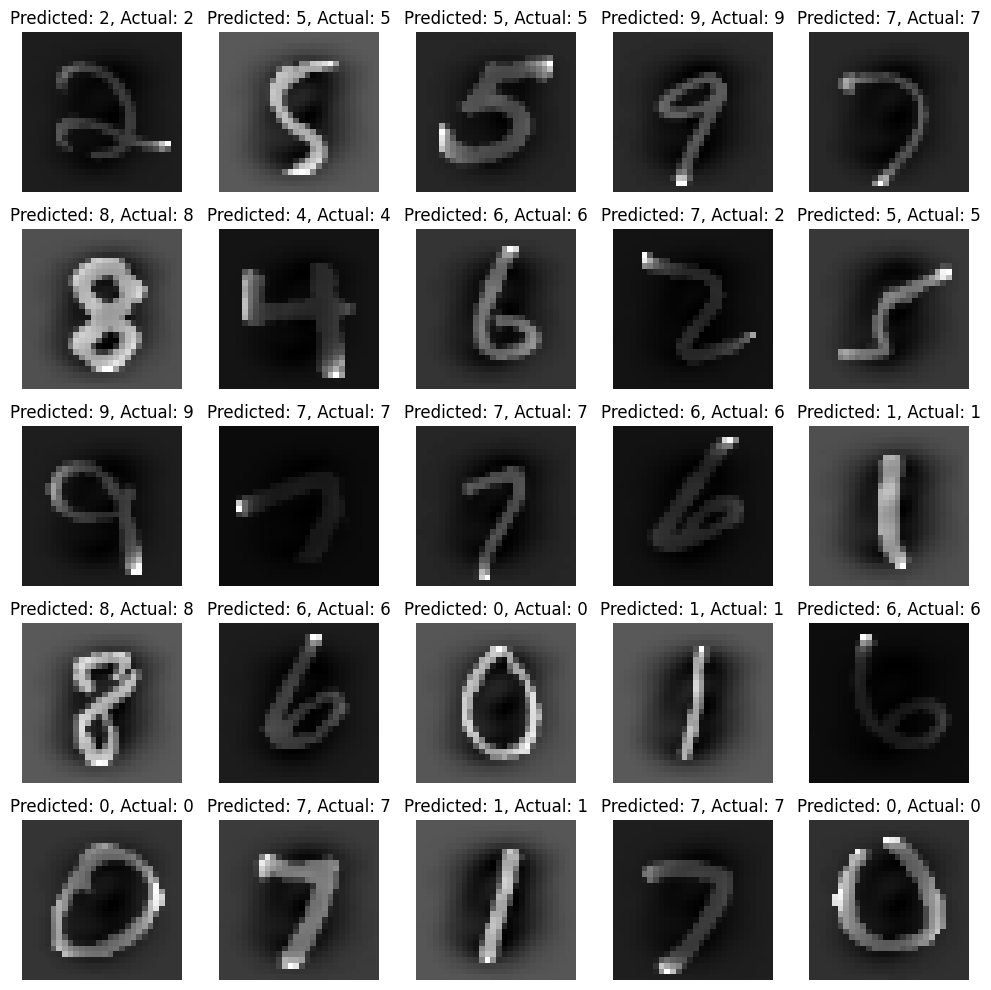

In [13]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Predicted: {y_pred[i]}, Actual: {y_test.values[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()
